In [47]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils import np_utils
from keras.layers import Dense, Embedding, LSTM, Dropout, Conv1D, MaxPooling1D, Activation
from keras.models import Sequential

In [48]:
from keras.datasets import imdb
from keras.preprocessing import sequence

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 5000)

x_train = sequence.pad_sequences(x_train, maxlen = 100)
x_test = sequence.pad_sequences(x_test, maxlen = 100)

In [49]:
x_train.shape

(25000, 100)

In [50]:
model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64,5, padding = 'valid', activation = 'relu', strides = 1))
model.add(MaxPooling1D(pool_size = 4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_4 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_3 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 55)                26400     
                                                                 
 dense_3 (Dense)             (None, 1)                 56        
                                                      

In [51]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
import os

model.compile(optimizer='adam', 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

#학습 업데이트 & 저장 & 학습 중단
MODEL = './model/'
if not os.path.exists(MODEL):
  os.mkdir(MODEL)
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'

checkP = ModelCheckpoint(filepath = modelpath, monitors = 'val_loss', verbose = 1, save_best_only = True)

early = EarlyStopping(monitor = 'val_loss', patience = 100)

#모델 업데이트, 학습 중단
history = model.fit(x_train, y_train, batch_size=100, epochs = 10, validation_data = (x_test, y_test), callbacks = [early, checkP])

#그냥
#history = model.fit(x_train, y_train, batch_size=100, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
250/250 [==============================] - ETA: 0s - loss: 0.4507 - accuracy: 0.7716
Epoch 1: val_loss improved from inf to 0.34153, saving model to ./model/01-0.3415.hdf5
250/250 [==============================] - 34s 128ms/step - loss: 0.4507 - accuracy: 0.7716 - val_loss: 0.3415 - val_accuracy: 0.8520
Epoch 2/10
250/250 [==============================] - ETA: 0s - loss: 0.2934 - accuracy: 0.8748
Epoch 2: val_loss improved from 0.34153 to 0.33774, saving model to ./model/02-0.3377.hdf5
250/250 [==============================] - 31s 125ms/step - loss: 0.2934 - accuracy: 0.8748 - val_loss: 0.3377 - val_accuracy: 0.8517
Epoch 3/10
250/250 [==============================] - ETA: 0s - loss: 0.2464 - accuracy: 0.8998
Epoch 3: val_loss improved from 0.33774 to 0.33080, saving model to ./model/03-0.3308.hdf5
250/250 [==============================] - 31s 124ms/step - loss: 0.2464 - accuracy: 0.8998 - val_loss: 0.3308 - val_accuracy: 0.8540
Epoch 4/10
250/250 [=====================

In [52]:
print('Test Accuracy : %.4f' %(model.evaluate(x_test,y_test)[1]))

782/782 [==============================] - 9s 11ms/step - loss: 0.5105 - accuracy: 0.8455
Test Accuracy : 0.8455


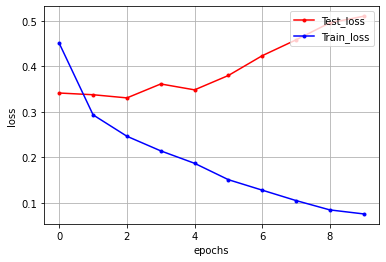

In [53]:
import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c= 'red', label = 'Test_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Train_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()